In [2]:

# What is screen scraping?!

# Screen scraping refers to the process of extracting data from the display output of another program. It involves 
# programmatically capturing the information displayed on the screen of a computer, mobile device, or any other electronic 
# device, and then parsing and extracting the relevant data for use in another application or system.

# Screen scraping is often used when data is not easily accessible through traditional methods such as APIs or databases. 
# It's commonly employed to extract data from websites, especially when the website does not provide an API for accessing 
# its data programmatically. However, screen scraping can also be used to extract data from various types of applications, 
# such as desktop applications, mobile apps, or legacy systems.

# While screen scraping can be a useful technique for accessing data, it can also be more fragile and less reliable than other 
# methods of data extraction. This is because it relies on parsing the visual layout of the screen, which can change over 
# time due to updates or modifications to the source application or website. Additionally, screen scraping may raise legal 
# and ethical concerns, especially if it violates the terms of service of the website or application being scraped.

#  So...let's be careful here..and proceed with caution...


# How do we even get started here?!
# Let's say this is the URL...
# https://www.ncaa.com/scoreboard/basketball-men/d1/2024/01/01

# Just right-click the item and then click 'Inspect (Q)'


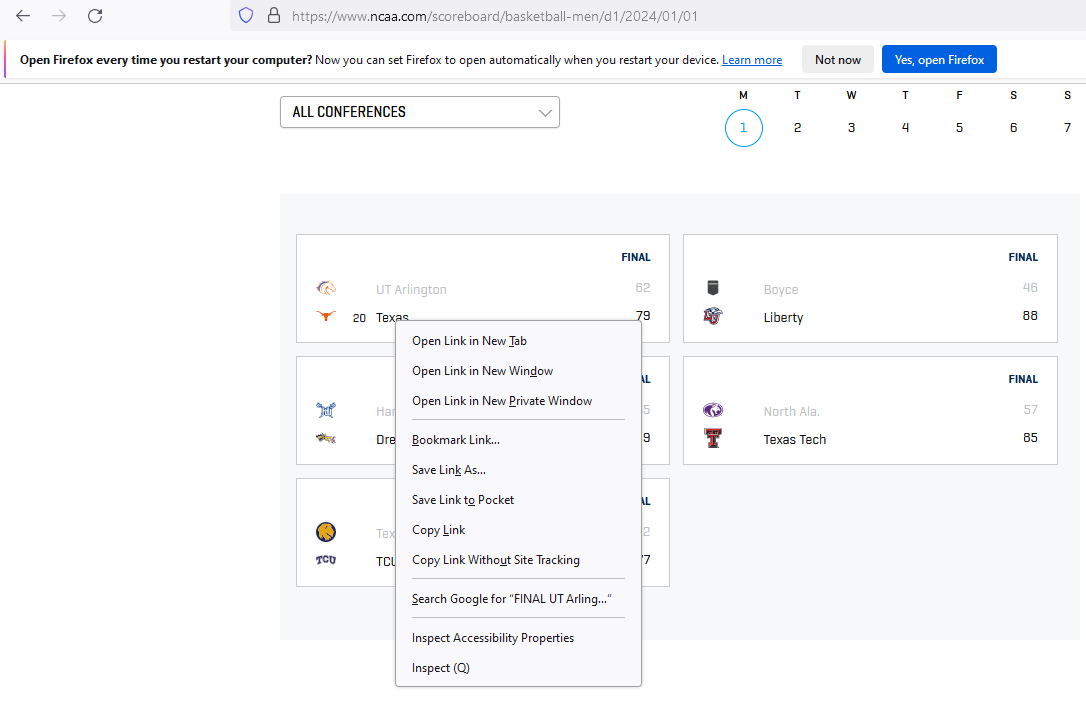

In [4]:

# Right click your mouse on the HTML item that you want to see the 'code behind', and click 'Inspect (Q)'.

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\ryan_\\Desktop\\"
Image(filename = PATH + "1.png")


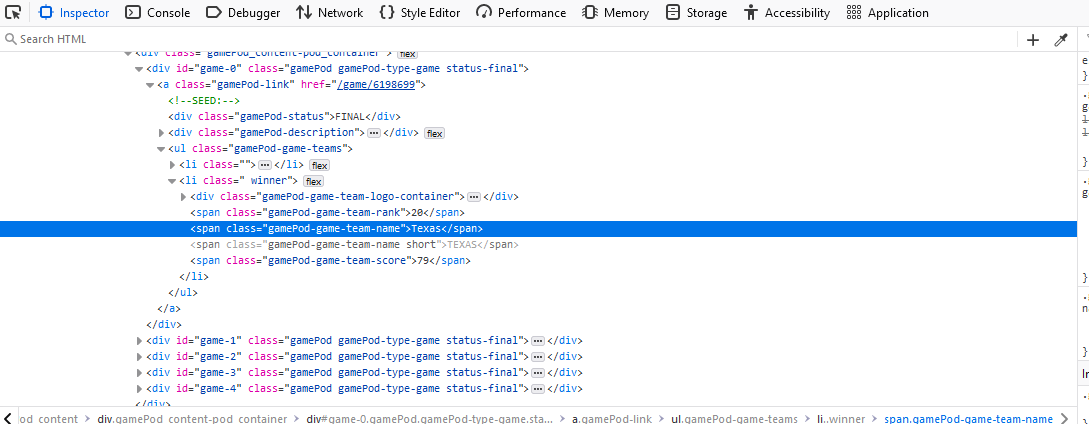

In [5]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\ryan_\\"
Image(filename = PATH + "2.png")


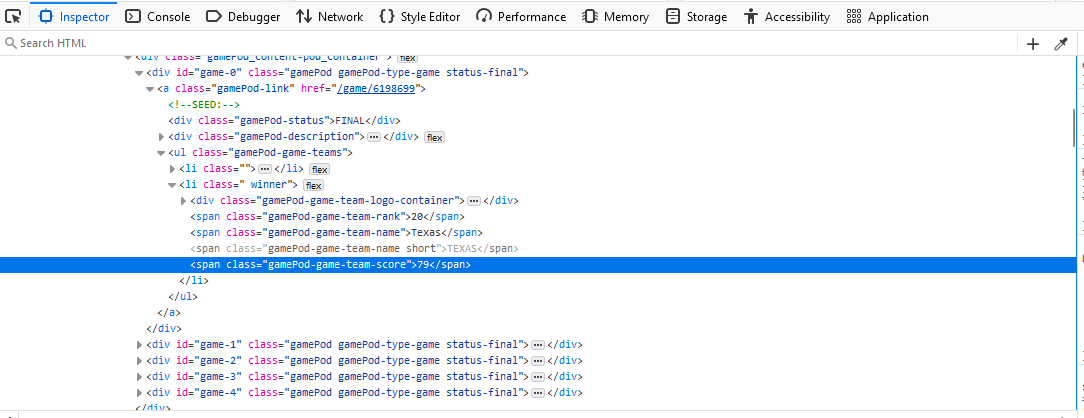

In [6]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\ryan_\\"
Image(filename = PATH + "3.png")


In [ ]:

# This may seem bewildering and a bit unorthodox, and I understand that. Keep up with me, and you will learn an absolut ton!!
# We need to find two HTML elements...

# team_name_spans = soup.find_all('span', class_='gamePod-game-team-name')
# score_spans = soup.find_all('span', class_='gamePod-game-team-score')
    

In [3]:

# Import the required libraries that we need to get this job done!

import requests
from bs4 import BeautifulSoup
import datetime
import pandas as pd
import re



# Function to scrape team names and scores from a given date URL
def scrape_team_names_and_scores(date_url):
    # Make a GET request to the date URL
    response = requests.get(date_url)
    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')
    # Find all spans with class 'gamePod-game-team-name' and 'gamePod-game-team-score'
    team_name_spans = soup.find_all('span', class_='gamePod-game-team-name')
    score_spans = soup.find_all('span', class_='gamePod-game-team-score')
    
    # Extract team names and scores
    team_names = [span.get_text() for span in team_name_spans]
    scores = [span.get_text() for span in score_spans]
    
    # Pair team names with scores
    team_score_pairs = [(team_names[i], scores[i], team_names[i + 1], scores[i + 1]) for i in range(0, len(team_names), 2)]
    
    return team_score_pairs


# Function to generate date URLs
def generate_date_urls(start_date, end_date):
    date_urls = []
    # Loop through dates from start_date to end_date
    current_date = start_date
    while current_date <= end_date:
        # Generate date URL for current_date
        date_url = f"https://www.ncaa.com/scoreboard/basketball-men/d1/{current_date.year}/{current_date.month:02d}/{current_date.day:02d}"
        date_urls.append(date_url)
        # Move to the next date
        current_date += datetime.timedelta(days=1)
    return date_urls


# Define start and end dates
start_date = datetime.date(2024, 1, 1)
end_date = datetime.date(2024, 1, 31)

# Initialize lists to store data
all_dates = []
all_teams1 = []
all_scores1 = []
all_teams2 = []
all_scores2 = []

# Generate date URLs
date_urls = generate_date_urls(start_date, end_date)

# Loop through date URLs and scrape team names and scores
for date_url in date_urls:
    team_score_pairs = scrape_team_names_and_scores(date_url)
    for pair in team_score_pairs:
        # Add data to lists
        all_dates.append(date_url)
        all_teams1.append(pair[0])
        all_scores1.append(pair[1])
        all_teams2.append(pair[2])
        all_scores2.append(pair[3])

# Create DataFrame
df = pd.DataFrame({
    'Date': all_dates,
    'Team1': all_teams1,
    'Score1': all_scores1,
    'Team2': all_teams2,
    'Score2': all_scores2
})

# Display DataFrame
print(df.shape)
print(df.tail())



# Define a function to extract the date from the URL
def extract_date(url):
    pattern = r'/(\d{4}/\d{2}/\d{2})$'  # Regex pattern to match the date at the end of the URL
    match = re.search(pattern, url)  # Search for the pattern in the URL
    if match:
        return match.group(1)  # Return the matched date
    else:
        return None

# Apply the function to the URL column and create a new column for the extracted date
df['DateOnly'] = df['Date'].apply(extract_date)

# Display the updated dataframe
print(df.tail())



# Function to determine the result of a game
def determine_result(row):
    if row['Score1'] > row['Score2']:
        return 'Win', 'Loss'
    elif row['Score1'] < row['Score2']:
        return 'Loss', 'Win'
    else:
        return 'Tie', 'Tie'

# Apply the function to each row to determine the result
df['Result_team1'], df['Result_team2'] = zip(*df.apply(determine_result, axis=1))
print(df.shape)



df['WL_team1'] = df['Team1']+'-'+df['Result_team1']
df['WL_team2'] = df['Team2']+'-'+df['Result_team2']
print(df.head())


# Let's export the data and view it in MS Excel, just so we can visualize what we think we are actually doing here...
# df.to_csv('C:\\Users\\ryan_\\Desktop\\df_wins_losses.csv')


(1415, 5)
                                                   Date        Team1 Score1  \
1410  https://www.ncaa.com/scoreboard/basketball-men...   Providence     65   
1411  https://www.ncaa.com/scoreboard/basketball-men...   Vanderbilt     54   
1412  https://www.ncaa.com/scoreboard/basketball-men...          UAB     82   
1413  https://www.ncaa.com/scoreboard/basketball-men...    Boise St.     86   
1414  https://www.ncaa.com/scoreboard/basketball-men...  Santa Clara     77   

                  Team2 Score2  
1410              UConn     74  
1411             Auburn     81  
1412        North Texas     79  
1413         New Mexico     78  
1414  Saint Mary's (CA)     82  
                                                   Date        Team1 Score1  \
1410  https://www.ncaa.com/scoreboard/basketball-men...   Providence     65   
1411  https://www.ncaa.com/scoreboard/basketball-men...   Vanderbilt     54   
1412  https://www.ncaa.com/scoreboard/basketball-men...          UAB     82   
1

In [7]:

# Ok, so we just did some really cool, complex, and also awesome screen-scraping. Let's continue on to another secnario.
# This time we will import a JSON string into memory. Everything in Python is preserved in memory, until the object is 
# actually saved down as a hard file (csv, txt, xlsx, html, etc., etc., etc.)

import requests
import pandas as pd
import json


# URL of the JSON endpoint
url = "https://cdn.nba.com/static/json/liveData/odds/odds_todaysGames.json"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON data
    json_data = response.json()
    
    # Check if the 'games' key is present in the JSON data
    if 'games' in json_data:
        # Iterate over each game in the JSON data
        for game in json_data['games']:
            # Extract relevant information about the game
            game_id = game.get('gameId')
            home_team_id = game.get('homeTeamId')
            away_team_id = game.get('awayTeamId')
            print("Game ID:", game_id)
            print("Home Team ID:", home_team_id)
            print("Away Team ID:", away_team_id)
            
            # Iterate over each market (e.g., 2way, spread) for the game
            for market in game.get('markets', []):
                market_name = market.get('name')
                print("\nMarket:", market_name)
                
                # Iterate over each bookmaker for the market
                for bookmaker in market.get('books', []):
                    bookmaker_name = bookmaker.get('name')
                    print("Bookmaker:", bookmaker_name)
                    
                    # Iterate over each outcome (e.g., home, away) for the bookmaker
                    for outcome in bookmaker.get('outcomes', []):
                        outcome_type = outcome.get('type')
                        odds = outcome.get('odds')
                        print("Outcome Type:", outcome_type)
                        print("Odds:", odds)
                        print()
    else:
        print("No 'games' key found in the JSON data.")
else:
    print("Failed to retrieve data. Status code:", response.status_code)


Game ID: 0022300733
Home Team ID: 1610612754
Away Team ID: 1610612744

Market: 2way
Bookmaker: Labanca
Outcome Type: home
Odds: 1.330

Outcome Type: away
Odds: 2.550

Bookmaker: FanDuel
Outcome Type: home
Odds: 1.455

Outcome Type: away
Odds: 2.840

Bookmaker: Betplay
Outcome Type: home
Odds: 1.420

Outcome Type: away
Odds: 2.950

Bookmaker: TabAustralia
Outcome Type: home
Odds: 1.440

Outcome Type: away
Odds: 2.900


Market: spread
Bookmaker: Labanca
Bookmaker: FanDuel
Outcome Type: home
Odds: 1.877

Outcome Type: away
Odds: 1.943

Bookmaker: Betplay
Outcome Type: home
Odds: 1.820

Outcome Type: away
Odds: 2.020

Bookmaker: TabAustralia
Outcome Type: home
Odds: 1.850

Outcome Type: away
Odds: 1.900

Game ID: 0022300734
Home Team ID: 1610612753
Away Team ID: 1610612759

Market: 2way
Bookmaker: Labanca
Outcome Type: home
Odds: 1.150

Outcome Type: away
Odds: 3.550

Bookmaker: FanDuel
Outcome Type: home
Odds: 1.200

Outcome Type: away
Odds: 4.850

Bookmaker: Betplay
Outcome Type: home
Od

In [8]:

# Parse JSON object into a dictionary object so it is readable by a human being.
data = json_data

# Normalize the dictionary
normalized_data = {"games": []}
for game in data["games"]:
    normalized_game = {
        "gameId": game["gameId"],
        "sr_id": game["sr_id"],
        "srMatchId": game["srMatchId"],
        "homeTeamId": game["homeTeamId"],
        "awayTeamId": game["awayTeamId"],
        "markets": []
    }
    for market in game["markets"]:
        for book in market["books"]:
            # Check if "outcomes" key exists in the book
            if "outcomes" in book:
                for outcome in book["outcomes"]:
                    normalized_market = {
                        "name": market["name"],
                        "odds_type_id": market["odds_type_id"],
                        "group_name": market["group_name"],
                        "book_id": book["id"],
                        "book_name": book["name"],
                        "url": book["url"],
                        "countryCode": book["countryCode"],
                        "type": outcome["type"],
                        "odds": outcome.get("odds"),
                        "opening_odds": outcome.get("opening_odds"),
                        "odds_trend": outcome.get("odds_trend"),
                        "spread": outcome.get("spread"),
                        "opening_spread": outcome.get("opening_spread"),
                    }
                    normalized_game["markets"].append(normalized_market)
            else:
                # If "outcomes" key doesn't exist, add book information without outcomes
                normalized_market = {
                    "name": market["name"],
                    "odds_type_id": market["odds_type_id"],
                    "group_name": market["group_name"],
                    "book_id": book["id"],
                    "book_name": book["name"],
                    "url": book["url"],
                    "countryCode": book["countryCode"],
                    "type": None,
                    "odds": None,
                    "opening_odds": None,
                    "odds_trend": None,
                    "spread": None,
                    "opening_spread": None,
                }
                normalized_game["markets"].append(normalized_market)
    normalized_data["games"].append(normalized_game)

# Convert normalized data back to JSON string
normalized_json_string = json.dumps(normalized_data, indent=2)
print(type(normalized_json_string))


<class 'str'>


In [9]:

# Now we have to flatten the hierarchially orderd JSON object.

import pandas as pd
import json

# Assuming 'normalized_json_string' contains the JSON data
# Load JSON string into a dictionary
data = json.loads(normalized_json_string)

# Flatten the JSON data and convert it into a dataframe
df_list = []
for game in data['games']:
    for market in game['markets']:
        market_data = {
            'gameId': game['gameId'],
            'sr_id': game['sr_id'],
            'srMatchId': game['srMatchId'],
            'homeTeamId': game['homeTeamId'],
            'awayTeamId': game['awayTeamId'],
            'market_name': market['name'],
            'odds_type_id': market['odds_type_id'],
            'group_name': market['group_name'],
            'book_id': market['book_id'],
            'book_name': market['book_name'],
            'url': market['url'],
            'countryCode': market['countryCode'],
            'type': market.get('type'),
            'odds': market.get('odds'),
            'opening_odds': market.get('opening_odds'),
            'odds_trend': market.get('odds_trend'),
            'spread': market.get('spread'),
            'opening_spread': market.get('opening_spread')
        }
        df_list.append(market_data)

# Create a dataframe from the list of dictionaries
df = pd.DataFrame(df_list)

# Display the dataframe
print(df)


# df.to_csv('C:\\Users\\ryan_\\Desktop\\df_json_normalized.csv')


         gameId              sr_id srMatchId  homeTeamId  awayTeamId  \
0    0022300733  sr:match:43066711  43066711  1610612754  1610612744   
1    0022300733  sr:match:43066711  43066711  1610612754  1610612744   
2    0022300733  sr:match:43066711  43066711  1610612754  1610612744   
3    0022300733  sr:match:43066711  43066711  1610612754  1610612744   
4    0022300733  sr:match:43066711  43066711  1610612754  1610612744   
..          ...                ...       ...         ...         ...   
215  0022300747  sr:match:43066739  43066739  1610612747  1610612740   
216  0022300747  sr:match:43066739  43066739  1610612747  1610612740   
217  0022300747  sr:match:43066739  43066739  1610612747  1610612740   
218  0022300747  sr:match:43066739  43066739  1610612747  1610612740   
219  0022300747  sr:match:43066739  43066739  1610612747  1610612740   

    market_name  odds_type_id group_name        book_id     book_name  \
0          2way             1    regular    sr:book:818       

In [1]:

# https://the-odds-api.com/
import pandas as pd
import requests
import json


# Get a free API key at https://api.the-odds-api.com/
API_KEY = 'your_api_key_here'

SPORT = 'upcoming'      # use the sport_key from the /sports endpoint below, or use 'upcoming' to see the next 8 games across all sports
REGIONS = 'us'          # uk | us | eu | au. Multiple can be specified if comma delimited
MARKETS = 'h2h,spreads' # h2h | spreads | totals. Multiple can be specified if comma delimited
ODDS_FORMAT = 'decimal' # decimal | american
DATE_FORMAT = 'iso'     # iso | unix

sports_response = requests.get(
    'https://api.the-odds-api.com/v4/sports', 
    params={
        'api_key': API_KEY
    }
)


if sports_response.status_code != 200:
    print(f'Failed to get sports: status_code {sports_response.status_code}, response body {sports_response.text}')

else:
    print('List of in season sports:', sports_response.json())

    
# Parse the JSON string
data = sports_response.json()

# Normalize the data into a structured format
normalized_data = []

for item in data:
    normalized_item = {
        "sport": item["group"],
        "name": item["title"],
        "description": item["description"],
        "active": item["active"],
        "has_outrights": item["has_outrights"]
    }
    normalized_data.append(normalized_item)

# Convert the normalized data back to JSON string
normalized_json_string = json.dumps(normalized_data, indent=4)

# Print the normalized JSON string
print(type(normalized_data))
print(type(normalized_json_string))


# Convert JSON data to DataFrame
df = pd.DataFrame(normalized_data)

# Print the DataFrame
print(df)


List of in season sports: [{'key': 'americanfootball_ncaaf', 'group': 'American Football', 'title': 'NCAAF', 'description': 'US College Football', 'active': True, 'has_outrights': False}, {'key': 'americanfootball_ncaaf_championship_winner', 'group': 'American Football', 'title': 'NCAAF Championship Winner', 'description': 'US College Football Championship Winner', 'active': True, 'has_outrights': True}, {'key': 'americanfootball_nfl_super_bowl_winner', 'group': 'American Football', 'title': 'NFL Super Bowl Winner', 'description': 'Super Bowl Winner 2024/2025', 'active': True, 'has_outrights': True}, {'key': 'aussierules_afl', 'group': 'Aussie Rules', 'title': 'AFL', 'description': 'Aussie Football', 'active': True, 'has_outrights': False}, {'key': 'baseball_mlb_world_series_winner', 'group': 'Baseball', 'title': 'MLB World Series Winner', 'description': 'World Series Winner 2024', 'active': True, 'has_outrights': True}, {'key': 'baseball_ncaa', 'group': 'Baseball', 'title': 'NCAA Base

In [2]:

import pandas as pd
import requests


url = "https://api.prop-odds.com/beta/games/nhl?date=2023-03-07&tz=America/New_York&api_key=H9LyOBIf7AAaiLkzlON1IKPk6qjhZtuozmrH6nEUO4"
params = {
    "date": "2023-03-07",
    "tz": "America/New_York",
    "api_key": "your_api_key_here"
}

response = requests.get(url, params=params)

if response.status_code == 200:
    # API call was successful
    data = response.json()
    print(data)  # or do something with the data
else:
    # API call failed
    print("Failed to fetch data. Status code:", response.status_code)

# Normalize the JSON data into a DataFrame
normalized_data = pd.json_normalize(data['games'])

# Print the normalized DataFrame
print(normalized_data)


{'league': 'nhl', 'date': '2023-03-07', 'games': [{'game_id': '4752425048c84411ac758f1d37a5cdcd', 'away_team': 'Toronto Maple Leafs', 'home_team': 'New Jersey Devils', 'start_timestamp': '2023-03-08T00:00:00Z', 'participants': []}, {'game_id': 'ee5c9178cf8d6f4d7bc81897a76b542d', 'away_team': 'Columbus Blue Jackets', 'home_team': 'Pittsburgh Penguins', 'start_timestamp': '2023-03-08T00:00:00Z', 'participants': []}, {'game_id': 'c301e5df55bde8d98eb3ae7e3fa67c84', 'away_team': 'Carolina Hurricanes', 'home_team': 'Montréal Canadiens', 'start_timestamp': '2023-03-08T00:00:00Z', 'participants': []}, {'game_id': '29c2f5d4b025d1d39a10aa05102ded02', 'away_team': 'Vegas Golden Knights', 'home_team': 'Florida Panthers', 'start_timestamp': '2023-03-08T00:00:00Z', 'participants': []}, {'game_id': 'fb9f8de2b5c1b8b2114d1afe904935d3', 'away_team': 'Philadelphia Flyers', 'home_team': 'Tampa Bay Lightning', 'start_timestamp': '2023-03-08T00:00:00Z', 'participants': []}, {'game_id': 'f17e3b5c75f601022585

In [3]:

# URL: 'https://www.metabet.io/products/hosted-odds'
# In a Mozilla browser, hit the F12 key
# Click on 'Network', about 3/4 of the way down the page, in the middle.
# Click on 'XHR', about 3/4 of the way down the page, in the panel on the right side of the screen
# Statos = 200, Method = Get, Initiator = xhr, Type = json
# From the in the panel on the right side of the screen...right-click on the URL and click 'Copy'


import json
import requests
from bs4 import BeautifulSoup
from pandas import json_normalize

api = 'your_api_key_here'
# Define Mozilla headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

# Send a GET request to the URL with Mozilla headers
url = "https://metabet.static.api.areyouwatchingthis.com/api/odds.json?apiKey={api}&location=NY&leagueCode=BKP"
response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON content directly
    data = response.json()

    # Print the parsed data
    print(json.dumps(data, indent=4))
else:
    print("Failed to retrieve data from the URL:", response.status_code)


# Convert JSON data to a string
json_string = json.dumps(data, indent=4)


# Define the file path to find the structure of the JSON dictionary...if necessary...
#file_path = 'C:\\Users\\ryan_\\Desktop\\output.json'

# Write the JSON string to a text file
#with open(file_path, 'w') as file:
#    file.write(json_string)
    
    
# Load the JSON string
data = json.loads(json_string)

# Flatten the JSON and convert it to a DataFrame
df = json_normalize(data['results'], 'odds', ['leagueCode', 'location', 'time', 'headline', 'sport'])

# Print the DataFrame
print(df)


{
    "meta": {
        "code": 200,
        "count": 12,
        "description": "Odds for [BKP] games"
    },
    "results": [
        {
            "gameID": 545123,
            "date": 1708646400000,
            "team2ID": 10192,
            "pointsLevel": "Guarded",
            "team2Initials": "CLE",
            "team1Color": "234aa6",
            "points": 50,
            "team1Name": "Magic",
            "team2City": "Cleveland",
            "team1City": "Orlando",
            "odds": [
                {
                    "date": 1708433898000,
                    "overUnder": 216.3,
                    "spreadLine2": 1.89044,
                    "provider": "CONSENSUS",
                    "spreadLine1": 1.92566,
                    "overUnderLineOver": 1.90817,
                    "overUnderLineUnder": 1.90227,
                    "moneyLine2": 1.30783,
                    "spread": -7.5,
                    "moneyLine1": 3.56
                },
                {
           

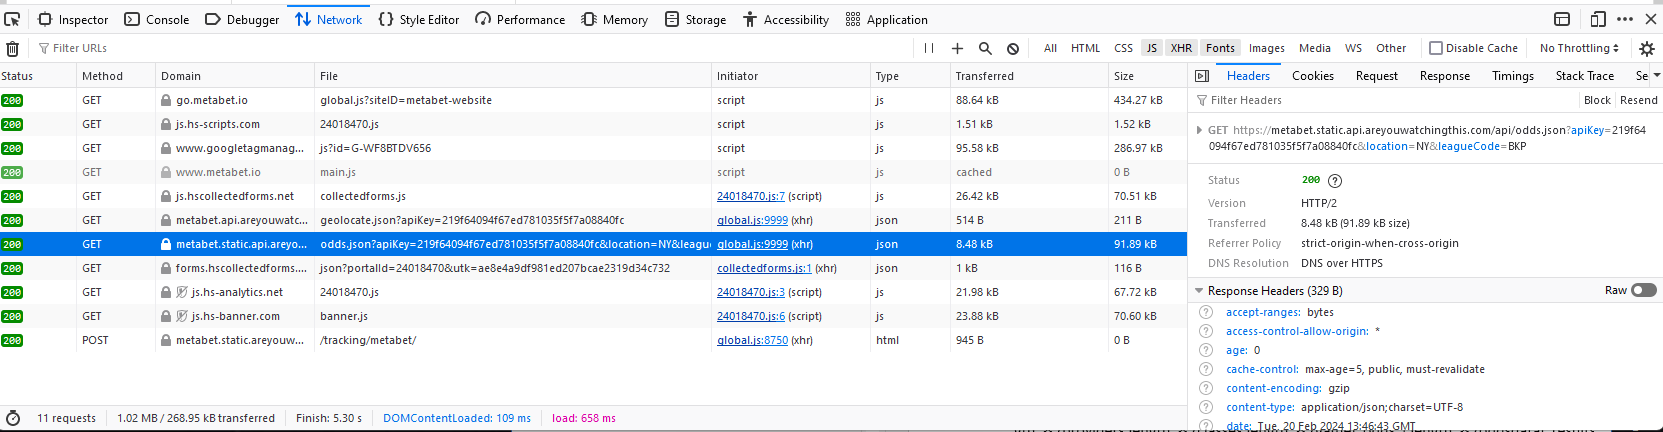

In [4]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\Screen Scraping\\"
Image(filename = PATH + "XHR.JPG")


In [1]:

# Stock Market Holiday Calendar 2024

import requests
import json
import pandas as pd
from bs4 import BeautifulSoup


url = "https://www.fxempire.com/tools/holiday-calendar"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36"
}


response = requests.get(url, headers=headers)


#if response.status_code == 200:
# Parse HTML content
soup = BeautifulSoup(response.text, 'html.parser')


# Find all 'td' elements with the specified class
td_elements = soup.find_all('td', class_='Td-sc-do7dui-0')

# Extract the desired information from each 'td' element
data = []
for td in td_elements:
    div_text = td.find('div', class_='Card-sc-1ib64vn-0').text.strip()
    span = td.find('span', class_='Span-sc-1abytr7-0')
    span_text = span.text.strip() if span else None
    data.append(div_text if div_text else span_text)

# Split the data into chunks of 4 elements (for each set of information)
chunks = [data[i:i + 4] for i in range(0, len(data), 4)]

# Create a DataFrame from the extracted data
df = pd.DataFrame(chunks, columns=['Event', 'Date', 'Country', 'Exchange'])

# Display the DataFrame
print(df.head())
print(df.tail())



                        Event          Date                       Country  \
0    Tuesday, March 19th 2024     Venezuela         Bolsa Valores Caracas   
1    Tuesday, March 19th 2024         Malta                   Malta Borza   
2  Wednesday, March 20th 2024       Tunisia                  Tunis Bourse   
3   Thursday, March 21st 2024         Syria  Damascus Securities Exchange   
4   Thursday, March 21st 2024  South Africa   Johannesburg Stock Exchange   

           Exchange  
0  St. Joseph's Day  
1  St. Joseph's Day  
2  Independence Day  
3      Mother's Day  
4  Human Rights Day  
                      Event              Date  \
366  Monday, June 10th 2024    Cayman Islands   
367  Monday, June 10th 2024          Colombia   
368  Monday, June 10th 2024         Australia   
369  Monday, June 10th 2024  Papua New Guinea   
370  Monday, June 10th 2024            Taiwan   

                                  Country              Exchange  
366         Cayman Islands Stock Exchange   